In [14]:
from PIL import Image, ImageDraw, ImageFont

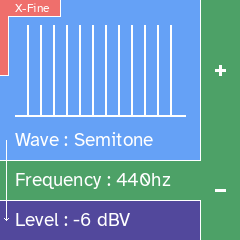

In [331]:
image = Image.new("RGB", (240, 240), (0, 0, 0))
draw = ImageDraw.Draw(image)
font = ImageFont.truetype("AtkinsonHyperlegible-Regular.ttf", 19)
small_font = ImageFont.truetype("AtkinsonHyperlegible-Regular.ttf", 12)
colour_palette = ["#65A1F6","#4DA167","#52489C","#EF6F6C"]

waves = ["Sine","Triangle","Square","Sawtooth","Inv Saw","White","Pink","Octaves","1/2 Oct","1/3 Oct","Whole Tone","Semitone"]

wave_index = 11

frequency =440
level = -6
active_param = 1
active_resolution = 2


render_display()
display(image)

In [319]:
def draw_octave_lines(num_lines):
    draw.line([15,115,185,115],width=2)
    for i in range(num_lines):
        draw.line([((i+1)*170/(num_lines+1)+15),115,(((i+1)*170/(num_lines+1))+15),25],width=2)

sine_img = Image.open("Sine_wave.png")
white_img = Image.open("White_Noise.png")
pink_img = Image.open("Pink_Noise.png")

def render_display():

    draw.rectangle([0,0,200,160],fill=colour_palette[0])
    draw.rectangle([0,160,200,200],fill=colour_palette[1])
    draw.rectangle([0,200,200,240],fill=colour_palette[2])
    # Parameter seperators
    draw.line([0,160,200,160])
    draw.line([0,200,200,200])

    draw.text((15, 127),"Wave : %s" % waves[wave_index],(255,255,255),font)
    draw.text((15, 167),"Frequency : %shz" % frequency,(255,255,255),font)
    draw.text((15, 207),"Level : %s dBV" % level,(255,255,255),font)

    # B button Arrow
    draw.line([6,140,6,220],width=1)
    draw.line([4,218,6,220,8,218],width=1)

    # A button, Control Resolution
    draw.rectangle([0,0,60,16],fill=colour_palette[3])
    draw.rectangle([0,0,8,75],fill=colour_palette[3])
    draw.line([0,75,8,75,8,16,60,16,60,0],width=1)
    match active_resolution:
        case 0:
            draw.text((15,0), "Coarse", font=small_font)
        case 1:
            draw.text((15,0), "Fine", font=small_font)
        case 2:
            draw.text((15,0), "X-Fine", font=small_font)



    match active_param:
        case 0:
            draw.rectangle([200,0,240,240],fill=colour_palette[0])
            draw.line([200,160,200,240])
        case 1:
            draw.rectangle([200,0,240,240],fill=colour_palette[1])
            draw.line([200,0,200,160])
            draw.line([200,200,200,240])
        case 2:
            draw.rectangle([200,0,240,240],fill=colour_palette[2])
            draw.line([200,0,200,200])
    
    # draw +
    draw.line([215,70,225,70],width=3)
    draw.line([220,65,220,75],width=3)
    # draw -
    draw.line([215,190,225,190],width=3)



    match wave_index:
        case 0: # Sine
            image.paste(sine_img,[15,25],mask=sine_img)
        case 1: # Triangle
            draw.line([15,70,57.5,25,100,70,142.5,115,185,70],width=2)
        case 2: # Square
            draw.line([15,70,15,25,100,25,100,115,185,115,185,70],width=2)
        case 3: # Saw
            draw.line([15,115,185,25,185,115,185,25],width=2)
        case 4: # Inv Saw
            draw.line([15,115,15,25,185,115,185,25],width=2)
        case 5: # White
            image.paste(white_img,[15,25])
        case 6: # Pink
            image.paste(pink_img,[15,25])
        case 7: # Octaves
            draw_octave_lines(1)
        case 8: # 1/2 Oct
            draw_octave_lines(2)
        case 9: # 1/3 Oct
            draw_octave_lines(3)
        case 10: # Whole Tone
            draw_octave_lines(6)
        case 11: # Semitone
            draw_octave_lines(12)
        